<h1><b>ML Intern Project: Predicting Car Selling Prices</h1></b>

<b><h3>First Step : Handle Basic Imports</h3></b>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<b><h3>Second Step:Use Pandas to Load the Data</h3></b>

In [44]:
dataset=pd.read_csv(r"../data/car.csv")
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [45]:
#No of rows
print(len(dataset))
print(dataset.dtypes)

8128
name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object


<h4> Checking The Columns</h4>

In [46]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

<h4>Here, I used a large language model (specifically ChatGPT) to help me understand the meaning of these columns. I also provided it with some context so it can follow the analysis and later offer valuable insights for visualization or prediction.</h4>



<h3>Third step:Clean the Data</h3>

In [47]:
#Firstly, check for any null data
print(dataset.isna().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


<h3>It is clear that there are multiple missing/NULL values in the dataset. This can cause problems, so managing it is a must</h3>
<h4>Now we must decide whether to impute using mean or median</h4>

In [48]:
#Firstly, convert the max_power(str) column to a float column

dataset["max_power"] = pd.to_numeric(dataset["max_power"], errors="coerce")


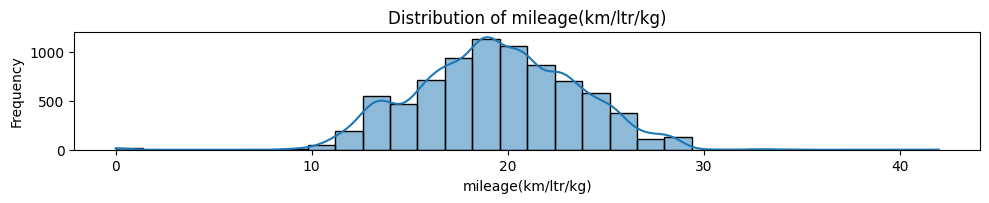

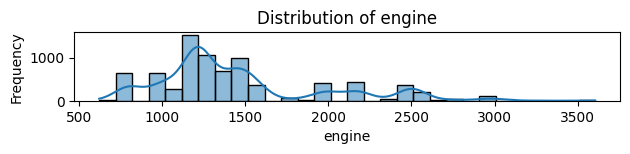

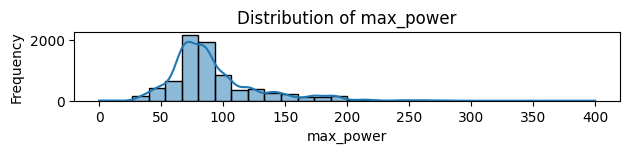

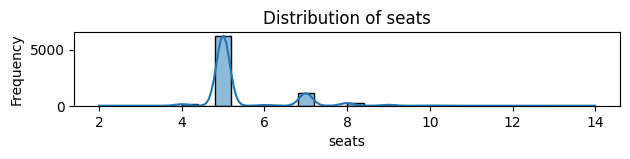

In [49]:
null_columns=["mileage(km/ltr/kg)","engine","max_power","seats"]

plt.figure(figsize=(10,7))

for index,val in enumerate(null_columns):
    plt.subplot(4,1,index+1)

    sns.histplot(dataset[val], kde=True, bins=30)
    plt.title(f'Distribution of {val}')
    plt.xlabel(val)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<h4>Here, I used a LLM to provide me the best way to check for optimal data imputation method(mean,median,mode). From the plot, since the curve for mileage is normal, mean is applicable and engine is clearly skewed with long tail in the right, so median is applicable</h4>

In [50]:
#Lets check the skewness numerically
for i in null_columns:
    skew_value = dataset[i].skew()
    print(f"Skewness of {i}: {skew_value:.2f}")


Skewness of mileage(km/ltr/kg): -0.14
Skewness of engine: 1.14
Skewness of max_power: 1.62
Skewness of seats: 1.97


<h4> From this insight, lets use mean for mileage, median for engine and max_power, and mode for seats, as there are few categorical values</h4>

In [52]:
dataset["mileage(km/ltr/kg)"]=dataset["mileage(km/ltr/kg)"].fillna(dataset["mileage(km/ltr/kg)"].mean())
dataset["engine"]=dataset["engine"].fillna(dataset["engine"].median())
dataset["max_power"]=dataset["max_power"].fillna(dataset["max_power"].median())
dataset["seats"]=dataset["seats"].fillna(dataset["seats"].median())

<h4>Lets check null values once again</h4>

In [53]:
dataset.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

<h4>Here, I notice some important columns like fuel, owner, transmission, and seller_type are in text format. For Machine Learning models, converting them to a numeric format is must. </h3>

In [57]:
#Check for unique values in each text-column
text_columns=["fuel","owner","transmission","seller_type"]

for i in text_columns:
    print(f"Unique Values of {i}: {set(dataset[i])}")

Unique Values of fuel: {'LPG', 'Diesel', 'CNG', 'Petrol'}
Unique Values of owner: {'Second Owner', 'First Owner', 'Third Owner', 'Test Drive Car', 'Fourth & Above Owner'}
Unique Values of transmission: {'Automatic', 'Manual'}
Unique Values of seller_type: {'Individual', 'Dealer', 'Trustmark Dealer'}


<h4>Let's map the text to numbers</h4>

In [58]:
fuel_map = {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3}
dataset['fuel'] = dataset['fuel'].map(fuel_map)


owner_map = {
    'First Owner': 0,
    'Second Owner': 1,
    'Third Owner': 2,
    'Fourth & Above Owner': 3,
    'Test Drive Car': 4  
}
dataset['owner'] = dataset['owner'].map(owner_map)

dataset['transmission'] = dataset['transmission'].map({'Manual': 0, 'Automatic': 1})

seller_map = {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}
dataset['seller_type'] = dataset['seller_type'].map(seller_map)



In [59]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,0,0,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,0,1,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,0,2,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,0,0,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,0,0,16.10,1298.0,88.20,5.0


<h3><b>Fourth Step:Exploratory Data Analysis and Data Visualization</h3></b>

<h4>Let's plot a correlation matrix</h4>

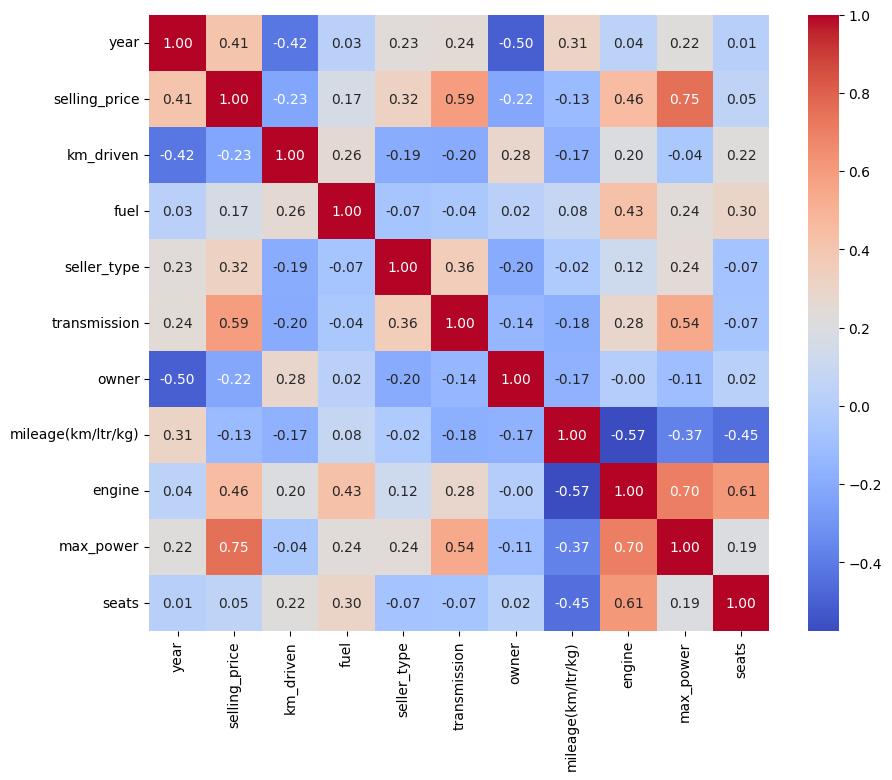

In [67]:
correlation_matrix=dataset.drop(columns=["name"]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()